# March 14, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Quick $\pi$-day experiment:

Consider a circle of radius $R$ circumscribed by a square of side lengths $2R$.

<IPython.core.display.Javascript object>


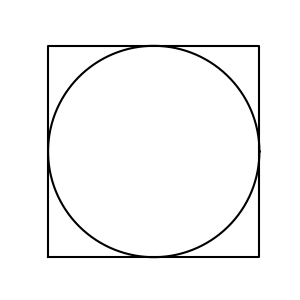

In [3]:
from math import pi

R = 1                                          # Choose circle radius

plt.figure(figsize=(3,3))
t = np.linspace(0,2*pi,500)                    # Parametrize a circle
plt.plot(R*np.cos(t),R*np.sin(t),'k-')         # plot a circle of radius R
plt.plot([-R,R,R,-R,-R],[-R,-R,R,R,-R],'k-')   # plot the circumscribing square with side lengths 2R
plt.axis('equal')                              # Fix aspect ratio to be 1:1
plt.axis('off')                                # Remove all axis labels and ticks
plt.show()

The area of the square is $A_{\text{square}} = (2R) \cdot (2R) = 4R^2$. The area of the circle is $A_{\text{circle}} = \pi R^2$. Then the ratio between the areas is
$$\frac{A_\text{circle}}{A_\text{square}} = \frac{\pi R^2}{4R^2} = \frac{\pi}{4}.$$
Solving for $\pi$ gives 
$$\pi = 4\cdot\frac{A_\text{circle}}{A_\text{square}}.$$

Without knowing $\pi$, we can approximate the ratio $\frac{A_\text{circle}}{A_\text{square}}$ by randomly selecting numerous coordinates $(x,y)$ with $-R \leq x,y \leq R$, then taking the ratio of the number of coordinates $(x,y)$ inside the circle (i.e. $x^2 + y^2 < R^2$) versus the total number of points selected.

<IPython.core.display.Javascript object>


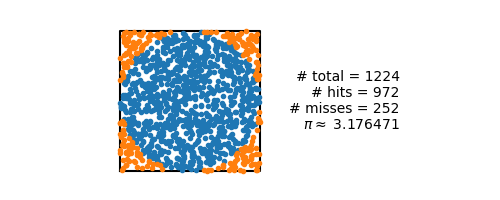

In [10]:
from numpy.random import rand                 # Generate uniformly random points between [0,1]
from time import time                         # Get current time (in seconds from epoch)

T = 30                                        # Fix simulation time...
                                              # ...the code will continue generating random
                                              # points until 'T' seconds have elapsed

R2 = R**2                                     # Pre-compute square radius

fig = plt.figure(figsize=(5,2))               # Generate figure
ax = plt.subplot(1,1,1)                       # Generate axes

ax.plot([-R,R,R,-R,-R],[-R,-R,R,R,-R],'k-')   # Plot circumscribing square with side lengths 2R
ax.set_xlim(-1.1*R,3*R)                       # Set x-limits of plot
ax.set_aspect('equal',adjustable='box')       # Fix aspect ratio to be 1:1
ax.axis('off')                                # Remove all axis labels and ticks

num_total = 0                                 # Total number of random points selected

num_hits = 0                                  # Count the number of points inside the circle
x_hits = []                                   # x-coordinates of each point inside the circle
y_hits = []                                   # y-coordinates of each points inside the circle

num_misses = 0                                # Count the number of points outside the circle
x_misses = []                                 # x-coordinates of each point outside the circle
y_misses = []                                 # y-coordinates of each point outside the circle

hits_plot, = ax.plot([],[],'C0.')             # Initialize plot of points inside the circle
misses_plot, = ax.plot([],[],'C1.')           # Initialize plot of points outside the circle

start_time = time()                           # Start timer
current_time = time()                         # Initialize current time

status_str = '# total = {:}\n'                # Build string template that will keep track...
status_str += '# hits = {:}\n'                # ...of the counts and approximation within...
status_str += '# misses = {:}\n'              # ...the figure
status_str += '$\pi \\approx$ {:7.6f}'

status_text = ax.text(1,.5,'',                # Initialize status text at position (1,.5)...
                      transform=ax.transAxes, # using axes coordinates...
                      ha='right',va='center') # ...with given horizontal and vertical text alignment

while current_time - start_time < T:          # Continue until 'T' seconds have elapsed
    current_time = time()                     # Update current time
    x,y = R*(2*rand(2) - 1)                   # Get new random coordinates
    num_total += 1                            # Increment total number of points selected
    
    r2 = x**2 + y**2                          # Compute distance from origin of new coordinates                
    if r2 < R2:                               # Check if (x,y) is inside the circle
        num_hits += 1                         # Increment number of points inside circle
        x_hits.append(x)                      # Update x-coordinates of points inside circle
        y_hits.append(y)                      # Update y-coordinates of points inside circle
        hits_plot.set_data(x_hits,y_hits)     # Update plot with new points inside circle
        
    else:                                     # Otherwise, point is outside circle 
        num_misses += 1                       # Increment number of points outside circle
        x_misses.append(x)                    # Update x-coordinates of points outside circle
        y_misses.append(y)                    # Update y-coordinates of points outside circle
        misses_plot.set_data(x_misses,y_misses) # Update plot with new points outside circle
        
    pi_approx = 4*num_hits/num_total          # Update approximation of pi
    
    status_text.set_text(status_str.format(num_total,  # Update status text
                                           num_hits,
                                           num_misses,
                                           pi_approx))
    
    fig.canvas.flush_events()                 # Required to force pyplot to update text
    fig.canvas.draw()                         # Force pyplot to update the figure

In [9]:
for n in np.arange(1,9):
    N = 10**n
    x,y = R*(2*np.random.rand(2,N) - 1)
    r2 = x**2 + y**2

    num_hits = (r2 < R2).sum()
    num_total = len(r2)
    pi_approx = 4*num_hits/num_total
    
    print('N = 10^{}: pi ~= {:7.6f}'.format(n,pi_approx))

N = 10^1: pi ~= 3.200000
N = 10^2: pi ~= 3.080000
N = 10^3: pi ~= 3.132000
N = 10^4: pi ~= 3.169200
N = 10^5: pi ~= 3.136200
N = 10^6: pi ~= 3.141600
N = 10^7: pi ~= 3.141770
N = 10^8: pi ~= 3.141464
